# PROJETO 3: BIBLIOTECAS PYTHON PARA ANÁLISE DE DADOS

## Objetivos

 1. *Introduzir as principais bibliotecas de Python para análise de dados:*
 Explorar bibliotecas amplamente utilizadas, como Pandas, NumPy e Matplotlib, e suas aplicações no tratamento de dados.

2. *Demonstrar o uso prático das bibliotecas para análise de dados:* Aplicar essas ferramentas em processos de manipulação, visualização e análise de dados reais.

3. *Praticar com dados da PNAD Contínua de 2024 (2º semestre):* Usar os dados da Pesquisa Nacional por Amostra de Domicílios (PNAD) Contínua, que investiga aspectos socioeconômicos da população brasileira, como educação, trabalho, e habitação, para simular análises de políticas públicas e entender o impacto de diferentes variáveis.

4. *Aplicar métodos avançados de análise com bibliotecas Python:* Implementar técnicas mais sofisticadas de análise para extrair insights profundos dos dados e explorar agrupamentos,função lambda, tendências e médias.

## Cenário

PNAD CONTINUA DE 2024 - 2 TRIMESTRE (ABR-MAIO-JUN)

Dados Brasil:  Com todos os estados

Dados Educação: A base de dados tem apenas dados demográficos e perguntas sobre educação.

Filtros iniciais:

1. Idade entre 18 e 90 anos

 - **OBJETIVO**

Entender como está o comportamento dos millenials brasileiros, também conhecida como geração Y, quando o cenário é educação.

### Preparando o Ambiente

In [ ]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# direciona para o caminho desejado
%cd /content/drive/MyDrive/PRETALAB/Bibliotecas \Python/Projeto3/

/content/drive/MyDrive/PRETALAB/Projeto 3


In [ ]:
#Este módulo fornece uma maneira simples de usar funcionalidades que são dependentes de sistema operacional
import os

# os.getcwd() retorna o caminho absoluto do diretório de trabalho atual
print(os.getcwd())

/content/drive/MyDrive/PRETALAB/Projeto 3


In [ ]:
# Mostra o conteudo do local/pasta
!ls

'Carolyne Santos de Oliveira - Pojeto3.ipynb'   dicionario_dados.xlsx
 dicionario_colunas.xlsx		        PNAD24_EDUCACAO.csv


### O que você precisa fazer no Projeto 3

  - **Etapa 1**

1. Carregar os arquivos 'PNAD24_EDUCACAO.csv', 'dicionario_colunas' com pandas

 - **ETAPA 2 Tratamento e Limpeza de Dados**

 1. Filtrar os dados para idade entre 18 e 35 anos - faixa etaria da geração Y
 2. tratar os valores das colunas conforme o dicionario de dados:

    sexo,
    idade,
    raça,
    sabe_ler_escrever

 3. transformar a coluna idade em faixa etaria conforme o intervalo: 18-23, 24-29 e 30-35.

 - **ETAPA 3: ANÁLISE**

 1.  Qual volume de pessoas que sabem ler e escrever?
   - Faça uma contagem na coluna e mostre o resultado como um gráfico de barras do matplotlib

  

2.  Como é a distribuição Brasil da geração Y pesquisada?

  - Agrupe a coluna sexo,raca, faixa_etaria,sigla_uf e sabe_ler_escrever fazendo a contagem desse agrupamento, salve em um dataframe o resultado.


3. Filtre o dataframe do ponto 2 para apenas os que lê e escreve, salve o resultado em novo dataframe.

4. Como é o comportamento de homens brancos e mulheres negras no  Brasil da geração Y pesquisada na faixa etária 18-23 que lê e escreve?

 - Faça um gráfico de barras horizontais para cada gênero filtrado pela raça de cada gênero, em que o eixo y é a sigla dos estados e o eixo x  o volume

 #dica: para filtrar o dataframe e fazer gráfico vc pode usar o método:

 df[((df_novo['coluna1'] == valor_filtro) & (df['coluna2'] == valor_filtro) & (df['coluna'] == valor_filtro))].plot(kind='barh', x='coluna1', y='contagem')


 5. Escreva uma conclusão do insights que encontrou no ponto 4 (OPCIONAL)

## Importando as bibliotecas

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

## ETAPA 1 Carregar arquivos

Etapa 1
Carregar os arquivos 'PNAD24_EDUCACAO.csv', 'dicionario_colunas' com pandas

In [ ]:
#Carregando os arquivos
df_educacao = pd.read_csv('PNAD24_EDUCACAO.csv', sep=',')
df_dicionario = pd.read_excel('dicionario_colunas.xlsx')

In [ ]:
# Visualizar informações do DataFrame
df_educacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363975 entries, 0 to 363974
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ano            363975 non-null  int64  
 1   trimestre      363975 non-null  int64  
 2   sigla_uf       363975 non-null  object 
 3   sigla_uf_nome  363975 non-null  object 
 4   id_pessoa      363975 non-null  int64  
 5   V2007          363975 non-null  object 
 6   V2009          363975 non-null  int64  
 7   V2010          363975 non-null  int64  
 8   V3001          363975 non-null  int64  
 9   V3002          363975 non-null  int64  
 10  V3002A         28613 non-null   float64
 11  V3003          0 non-null       float64
 12  V3003A         28613 non-null   float64
 13  V3004          0 non-null       float64
 14  V3005          0 non-null       float64
 15  V3005A         18116 non-null   float64
 16  V3006          24887 non-null   float64
 17  V3006A         267 non-null  

In [ ]:
# Para visualizar as primeiras linhas do DataFrame
print(df_educacao.head())

    ano  trimestre sigla_uf sigla_uf_nome        id_pessoa   V2007  V2009  \
0  2024          2       AP         Amapá  160000321011101  Mulher     27   
1  2024          2       AP         Amapá  160000321021101  Mulher     33   
2  2024          2       AP         Amapá  160000321021102   Homem     27   
3  2024          2       AP         Amapá  160000321031104  Mulher     27   
4  2024          2       AP         Amapá  160000321031102  Mulher     78   

   V2010  V3001  V3002  ...  V3009  V3009A  V3010  V3011  V3011A  V3012  \
0      4      1      2  ...    NaN    10.0    NaN    NaN     NaN    1.0   
1      4      1      2  ...    NaN    10.0    NaN    NaN     NaN    1.0   
2      4      1      2  ...    NaN     7.0    1.0    NaN     NaN    1.0   
3      1      1      2  ...    NaN    10.0    NaN    NaN     NaN    1.0   
4      4      2      2  ...    NaN     NaN    NaN    NaN     NaN    NaN   

   V3013  V3013A  V3013B  V3014  
0    3.0     NaN     NaN    1.0  
1    3.0     NaN  

In [ ]:
#Visualizar
df_dicionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   nome_coluna_codigo       29 non-null     object
 1   coluna_pergunta          29 non-null     object
 2   coluna__perguntas_abrev  29 non-null     object
dtypes: object(3)
memory usage: 824.0+ bytes


In [ ]:
# Para visualizar as primeiras linhas do DataFrame
print(df_dicionario.head())

  nome_coluna_codigo                coluna_pergunta coluna__perguntas_abrev
0                ano                            Ano                     ano
1          trimestre                      Trimestre               trimestre
2           sigla_uf  Sigla da Unidade da Federação                sigla_uf
3          id_pessoa         ID Pessoa Entrevistada               id_pessoa
4              V2007                           Sexo                    sexo


## ETAPA 2 Tratamento e Limpeza de Dados

 1. Filtrar os dados para idade entre 18 e 35 anos - faixa etaria da geração Y

In [ ]:
# Filtro
df_educacao_filtrado = df_educacao[(df_educacao['V2009'] >= 18) & (df_educacao['V2009'] <= 35)]

#Visualizar info do df filtrado
df_educacao_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117580 entries, 0 to 363972
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ano            117580 non-null  int64  
 1   trimestre      117580 non-null  int64  
 2   sigla_uf       117580 non-null  object 
 3   sigla_uf_nome  117580 non-null  object 
 4   id_pessoa      117580 non-null  int64  
 5   V2007          117580 non-null  object 
 6   V2009          117580 non-null  int64  
 7   V2010          117580 non-null  int64  
 8   V3001          117580 non-null  int64  
 9   V3002          117580 non-null  int64  
 10  V3002A         21994 non-null   float64
 11  V3003          0 non-null       float64
 12  V3003A         21994 non-null   float64
 13  V3004          0 non-null       float64
 14  V3005          0 non-null       float64
 15  V3005A         14897 non-null   float64
 16  V3006          20072 non-null   float64
 17  V3006A         82 non-null      fl

2. Tratar os valores das colunas conforme o dicionario de dados:

sexo, idade, raça, sabe_ler_escrever

In [ ]:
colunas_dicionario = {
    'sigla_uf_nome': 'estado',
    'sigla_uf': 'sigla',
    'V2007': 'sexo',
    'V2009': 'idade',
    'V3001': 'sabe_ler_escrever',
    'V2010': 'raça'
}

In [ ]:
#add o dicionario no df
df_renomeado = df_educacao_filtrado.rename(columns=colunas_dicionario)

In [ ]:
#visualizar linhas do  df
df_renomeado.head()

,ano,trimestre,sigla,estado,id_pessoa,sexo,idade,raça,sabe_ler_escrever,V3002,...,V3009,V3009A,V3010,V3011,V3011A,V3012,V3013,V3013A,V3013B,V3014
0,2024,2,AP,Amapá,160000321011101,Mulher,27,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,4,1,2,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0
3,2024,2,AP,Amapá,160000321031104,Mulher,27,1,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
5,2024,2,AP,Amapá,160000321031103,Homem,23,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0


In [ ]:
# Visualizar Valores Únicos da coluna 'raça'
print(df_renomeado['raça'].unique())


[4 1 2 5 3 9]


O [IBGE (Instituto Brasileiro de Geografia e Estatística)](https://www.ibge.gov.br/estatisticas/sociais/trabalho/22827-censo-demografico-2022.html?edicao=38698) classifica a cor ou raça das pessoas em várias categorias. As principais classificações de cor e raça, segundo o IBGE, são:

1. Branca
2. Preta
3. Parda
4. Amarela
5. Indígena

Essas categorias são utilizadas em censos e pesquisas para entender a composição étnica da população brasileira.

- O numero '9' que aparece no dataset resolvi tratar como 'Ignorado', conforme arquivo dicionario_dados.xlxs.
- Negros envolvem pretos e pardos.

In [ ]:
# Baixar arquivo 'dicionario_dados'
df_dicionario_dados = pd.read_excel('dicionario_dados.xlsx')

In [ ]:
# Dicionário de mapeamento
mapa_raca = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}

# Criar uma nova coluna 'descricao_raca' e substituir os valores na nova coluna
df_renomeado['descricao_raca'] = df_renomeado['raça'].replace(mapa_raca)

# Visualizar as primeiras linhas para verificar a nova coluna
df_renomeado[['raça', 'descricao_raca']].head()

,raça,descricao_raca
0,4,Parda
1,4,Parda
2,4,Parda
3,1,Branca
5,4,Parda


- Coluna 'sabe_ler_escrever' tratada conforme arquivo 'dicionario_dados.xlsx'

In [ ]:
# Criar a nova coluna 'sabe_ler_escrever' e substituir os valores, tratando nulos como 'Não Aplicável'
df_renomeado['le_escreve'] = df_renomeado['sabe_ler_escrever'].replace({1: 'Sim', 2: 'Não'}).fillna('Não Aplicável')

# Visualizar as primeiras linhas para verificar a substituição
df_renomeado[['sabe_ler_escrever', 'le_escreve']].head()

,sabe_ler_escrever,le_escreve
0,1,Sim
1,1,Sim
2,1,Sim
3,1,Sim
5,1,Sim


3. transformar a coluna idade em faixa etaria conforme o intervalo: 18-23, 24-29 e 30-35.

In [ ]:
# Definindo os limites das faixas etárias e os rótulos correspondentes
bins = [18, 23, 29, 35]  # Limites das faixas. De acordo com o labels (rótulos)
labels = ['18-23', '24-29', '30-35']  # Rótulos para as faixas

# Usando pd.cut() para criar a nova coluna 'faixa_etaria'
df_renomeado['faixa_etaria'] = pd.cut(df_renomeado['idade'], bins=bins, labels=labels, right=True)

In [ ]:
# Exibindo o DataFrame resultante
print(df_renomeado)

         ano  trimestre sigla               estado        id_pessoa    sexo  \
0       2024          2    AP                Amapá  160000321011101  Mulher   
1       2024          2    AP                Amapá  160000321021101  Mulher   
2       2024          2    AP                Amapá  160000321021102   Homem   
3       2024          2    AP                Amapá  160000321031104  Mulher   
5       2024          2    AP                Amapá  160000321031103   Homem   
...      ...        ...   ...                  ...              ...     ...   
363960  2024          2    RN  Rio Grande do Norte  240086301071101   Homem   
363961  2024          2    RN  Rio Grande do Norte  240086301071102  Mulher   
363964  2024          2    RN  Rio Grande do Norte  240086301091101  Mulher   
363967  2024          2    RN  Rio Grande do Norte  240086301121103  Mulher   
363972  2024          2    RN  Rio Grande do Norte  240086301131105  Mulher   

        idade  raça  sabe_ler_escrever  V3002  ... 

In [ ]:
# Selecionar as colunas que vamos utilizar
columns_selecionadas = ['ano', 'trimestre', 'sigla', 'estado', 'id_pessoa', 'sexo', 'idade', 'faixa_etaria', 'raça', 'descricao_raca', 'sabe_ler_escrever', 'le_escreve']

# Criar um novo DataFrame com as colunas selecionadas
df = df_renomeado[columns_selecionadas]

# Visualizar as primeiras linhas do novo DataFrame
print(df.head())

    ano  trimestre sigla estado        id_pessoa    sexo  idade faixa_etaria  \
0  2024          2    AP  Amapá  160000321011101  Mulher     27        24-29   
1  2024          2    AP  Amapá  160000321021101  Mulher     33        30-35   
2  2024          2    AP  Amapá  160000321021102   Homem     27        24-29   
3  2024          2    AP  Amapá  160000321031104  Mulher     27        24-29   
5  2024          2    AP  Amapá  160000321031103   Homem     23        18-23   

   raça descricao_raca  sabe_ler_escrever le_escreve  
0     4          Parda                  1        Sim  
1     4          Parda                  1        Sim  
2     4          Parda                  1        Sim  
3     1         Branca                  1        Sim  
5     4          Parda                  1        Sim  


 ## ETAPA 3 Análises

1. Qual volume de pessoas que sabem ler e escrever?
Faça uma contagem na coluna e mostre o resultado como um gráfico de barras do matplotlib

In [ ]:
# Visualizar Valores Únicos da coluna 'le_escreve'
print(df['le_escreve'].unique())

['Sim' 'Não']


In [ ]:
# Contando o número de pessoas que sabem ler e escrever
contagem = df['le_escreve'].value_counts()

# Usar as chaves 'Sim' e 'Não' em vez de números 1 e 2, pois já renomeamos a coluna.
sabe_ler = contagem.get('Sim', 0)  # Contagem de pessoas que sabem ler e escrever
nao_sabe_ler = contagem.get('Não', 0)  # Contagem de pessoas que não sabem ler e/ou escrever

# Imprimindo o resultado
print(f'O total de pessoas que sabem ler e escrever: {sabe_ler} pessoas.')
print(f'O total de pessoas que não sabem ler e escrever: {nao_sabe_ler} pessoas.')

O total de pessoas que sabem ler e escrever: 116065 pessoas.
O total de pessoas que não sabem ler e escrever: 1515 pessoas.


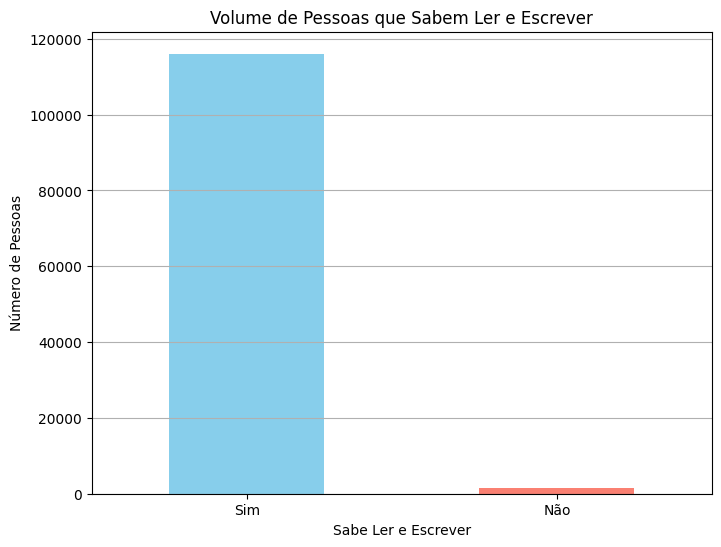

In [ ]:
# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
contagem.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Volume de Pessoas que Sabem Ler e Escrever')
plt.xlabel('Sabe Ler e Escrever')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)  # Para manter os rótulos na horizontal
plt.grid(axis='y')  # Adiciona uma grade horizontal para melhor visualização

# Exibindo o gráfico
plt.show()

3. Como é a distribuição Brasil da geração Y pesquisada?

Agrupe a coluna sexo,raca, faixa_etaria,sigla_uf e sabe_ler_escrever fazendo a contagem desse agrupamento, salve em um dataframe o resultado.

In [ ]:
# Visualizar Valores Únicos da coluna 'idade'
print(df['sexo'].unique())

['Mulher' 'Homem']


In [ ]:
# Filtrando apenas as pessoas do sexo masculino para facilitar a visualização e análise
df_masculino = df[df['sexo'] == 'Homem']

# Agrupando os dados e contando as ocorrências
distribuicao_gen_y_m = df_masculino.groupby(
    ['sexo', 'descricao_raca', 'faixa_etaria', 'sigla', 'le_escreve'],
    observed=False  # O 'observed=False', mostra todos os grupos, até mesmo aqueles que estão vazios, ou com numero 0
).size().reset_index(name='contagem')

In [ ]:
# Ajustando as opções de exibição
pd.set_option('display.max_rows', None)  # Mostrar todas as linhas

# Exibindo o DataFrame resultante
print(distribuicao_gen_y_m)

      sexo descricao_raca faixa_etaria sigla le_escreve  contagem
0    Homem        Amarela        18-23    AC        Não         0
1    Homem        Amarela        18-23    AC        Sim         0
2    Homem        Amarela        18-23    AL        Não         0
3    Homem        Amarela        18-23    AL        Sim         4
4    Homem        Amarela        18-23    AM        Não         0
5    Homem        Amarela        18-23    AM        Sim         1
6    Homem        Amarela        18-23    AP        Não         0
7    Homem        Amarela        18-23    AP        Sim         0
8    Homem        Amarela        18-23    BA        Não         1
9    Homem        Amarela        18-23    BA        Sim         1
10   Homem        Amarela        18-23    CE        Não         0
11   Homem        Amarela        18-23    CE        Sim         2
12   Homem        Amarela        18-23    DF        Não         0
13   Homem        Amarela        18-23    DF        Sim         1
14   Homem

In [ ]:
# Filtrando apenas as pessoas do sexo feminino para facilitar a visualização e análise
df_feminino = df[df['sexo'] == 'Mulher']

# Agrupando os dados e contando as ocorrências
distribuicao_gen_y_f = df_feminino.groupby(
    ['sexo', 'descricao_raca', 'faixa_etaria', 'sigla', 'le_escreve'],
    observed=False  # O 'observed=False', mostra todos os grupos, até mesmo aqueles que estão vazios, ou com numero 0
).size().reset_index(name='contagem')

In [ ]:
# Ajustando as opções de exibição
pd.set_option('display.max_rows', None)  # Mostrar todas as linhas

# Exibindo o DataFrame resultante
print(distribuicao_gen_y_f)

       sexo descricao_raca faixa_etaria sigla le_escreve  contagem
0    Mulher        Amarela        18-23    AC        Não         0
1    Mulher        Amarela        18-23    AC        Sim         2
2    Mulher        Amarela        18-23    AL        Não         0
3    Mulher        Amarela        18-23    AL        Sim         8
4    Mulher        Amarela        18-23    AM        Não         0
5    Mulher        Amarela        18-23    AM        Sim         4
6    Mulher        Amarela        18-23    AP        Não         0
7    Mulher        Amarela        18-23    AP        Sim         0
8    Mulher        Amarela        18-23    BA        Não         0
9    Mulher        Amarela        18-23    BA        Sim         4
10   Mulher        Amarela        18-23    CE        Não         0
11   Mulher        Amarela        18-23    CE        Sim         2
12   Mulher        Amarela        18-23    DF        Não         0
13   Mulher        Amarela        18-23    DF        Sim      

In [ ]:
# Agrupando os dados e contando as ocorrências
distribuicao_gen_y = df_renomeado.groupby(
    ['sexo', 'descricao_raca', 'faixa_etaria', 'sigla', 'le_escreve'],
    observed=True  # O 'observed=True', mostre apenas as combinações de grupos que aparecem nos dados, ou seja, grupos que não estejam vazios na base de dados.
).size().reset_index(name='contagem')

# Exibindo o DataFrame resultante
print(distribuicao_gen_y)

        sexo descricao_raca faixa_etaria sigla le_escreve  contagem
0      Homem        Amarela        18-23    AL        Sim         4
1      Homem        Amarela        18-23    AM        Sim         1
2      Homem        Amarela        18-23    BA        Não         1
3      Homem        Amarela        18-23    BA        Sim         1
4      Homem        Amarela        18-23    CE        Sim         2
5      Homem        Amarela        18-23    DF        Sim         1
6      Homem        Amarela        18-23    ES        Sim         3
7      Homem        Amarela        18-23    GO        Sim         2
8      Homem        Amarela        18-23    MA        Sim         5
9      Homem        Amarela        18-23    MS        Sim         3
10     Homem        Amarela        18-23    PA        Sim         5
11     Homem        Amarela        18-23    PE        Sim         3
12     Homem        Amarela        18-23    PI        Sim         1
13     Homem        Amarela        18-23    PR  

3. Filtre o dataframe do ponto 2 para apenas os que lê e escreve, salve o resultado em novo dataframe.

In [ ]:
# Filtrando para apenas aqueles que sabem ler e escrever
df_ler_escrever = distribuicao_gen_y[distribuicao_gen_y['le_escreve'] == 'Sim']

# Exibindo o novo DataFrame
print(df_ler_escrever)

        sexo descricao_raca faixa_etaria sigla le_escreve  contagem
0      Homem        Amarela        18-23    AL        Sim         4
1      Homem        Amarela        18-23    AM        Sim         1
3      Homem        Amarela        18-23    BA        Sim         1
4      Homem        Amarela        18-23    CE        Sim         2
5      Homem        Amarela        18-23    DF        Sim         1
6      Homem        Amarela        18-23    ES        Sim         3
7      Homem        Amarela        18-23    GO        Sim         2
8      Homem        Amarela        18-23    MA        Sim         5
9      Homem        Amarela        18-23    MS        Sim         3
10     Homem        Amarela        18-23    PA        Sim         5
11     Homem        Amarela        18-23    PE        Sim         3
12     Homem        Amarela        18-23    PI        Sim         1
13     Homem        Amarela        18-23    PR        Sim         2
14     Homem        Amarela        18-23    RJ  

4. Como é o comportamento de homens brancos e mulheres negras no Brasil da geração Y pesquisada na faixa etária 18-23 que lê e escreve?

Faça um gráfico de barras horizontais para cada gênero filtrado pela raça de cada gênero, em que o eixo y é a sigla dos estados e o eixo x o volume

**dica**: para filtrar o dataframe e fazer gráfico vc pode usar o método:

df[((df_novo['coluna1'] == valor_filtro) & (df['coluna2'] == valor_filtro) & (df['coluna'] == valor_filtro))].plot(kind='barh', x='coluna1', y='contagem')

In [ ]:
## Filtrando para homens brancos e mulheres negras na faixa etária 18-23 que sabem ler e escrever
# df_comportamento = df[
#     ((df['sexo'] == 'Homem') & (df['raça'] == 1) & (df['faixa_etaria'] == '18-23') & (df['sabe_ler_escrever'] == 1)) |
#     ((df['sexo'] == 'Mulher') & (df['raça'].isin([2, 3])) & (df['faixa_etaria'] == '18-23') & (df['sabe_ler_escrever'] == 1))
# ]

In [ ]:
# Filtrando para homens brancos e mulheres negras na faixa etária 18-23 que sabem ler e escrever
df_comportamento = df_ler_escrever[
    ((df_ler_escrever['sexo'] == 'Homem') & (df_ler_escrever['descricao_raca'] == 'Branca') & (df_ler_escrever['faixa_etaria'] == '18-23')) |
    ((df_ler_escrever['sexo'] == 'Mulher') & (df_ler_escrever['descricao_raca'].isin(['Preta', 'Parda'])) & (df_ler_escrever['faixa_etaria'] == '18-23')) #O método isin() é útil para verificar se um valor está presente em uma lista.
]

In [ ]:
# Exibindo o DataFrame
print(df_comportamento)

        sexo descricao_raca faixa_etaria sigla le_escreve  contagem
66     Homem         Branca        18-23    AC        Sim        70
68     Homem         Branca        18-23    AL        Sim       188
70     Homem         Branca        18-23    AM        Sim        90
71     Homem         Branca        18-23    AP        Sim        44
73     Homem         Branca        18-23    BA        Sim       120
75     Homem         Branca        18-23    CE        Sim       172
76     Homem         Branca        18-23    DF        Sim        93
77     Homem         Branca        18-23    ES        Sim       156
78     Homem         Branca        18-23    GO        Sim       170
80     Homem         Branca        18-23    MA        Sim       192
82     Homem         Branca        18-23    MG        Sim       392
84     Homem         Branca        18-23    MS        Sim       126
86     Homem         Branca        18-23    MT        Sim       113
88     Homem         Branca        18-23    PA  

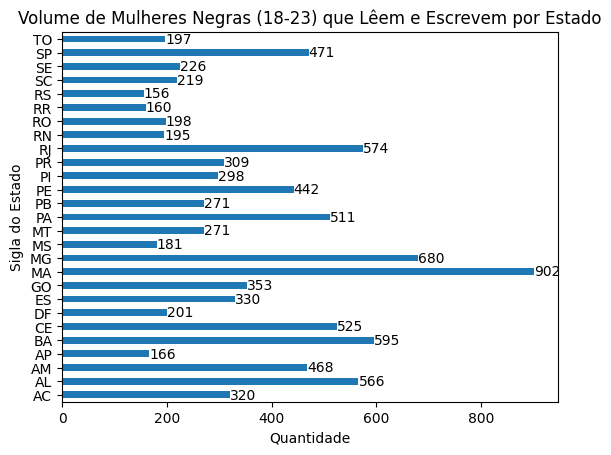

In [ ]:
# Filtro somente 'Mulher'
df_mulher_negra = df_comportamento[df_comportamento['sexo'] == 'Mulher']

# Agrupando os dados por sigla do estado e somando a contagem
grafico = df_mulher_negra.groupby('sigla')['contagem'].sum().reset_index()

# Plotando o gráfico de barras horizontais
ax = grafico.plot(kind='barh', x='sigla', y='contagem', legend=False)

# Adicionando título e rótulos
plt.title('Volume de Mulheres Negras (18-23) que Lêem e Escrevem por Estado')
plt.xlabel('Quantidade')
plt.ylabel('Sigla do Estado')

# Adicionando rótulos nas barras
for index, value in enumerate(grafico['contagem']):
    ax.text(value, index, str(value), va='center')

# Exibindo o gráfico
plt.show()

In [ ]:
# Filtro somente 'Homem'
df_homem_branco = df_comportamento[df_comportamento['sexo'] == 'Homem']

# Imprimir o DataFrame para verificar se há dados
df_homem_branco

,sexo,descricao_raca,faixa_etaria,sigla,le_escreve,contagem
66,Homem,Branca,18-23,AC,Sim,70
68,Homem,Branca,18-23,AL,Sim,188
70,Homem,Branca,18-23,AM,Sim,90
71,Homem,Branca,18-23,AP,Sim,44
73,Homem,Branca,18-23,BA,Sim,120
75,Homem,Branca,18-23,CE,Sim,172
76,Homem,Branca,18-23,DF,Sim,93
77,Homem,Branca,18-23,ES,Sim,156
78,Homem,Branca,18-23,GO,Sim,170
80,Homem,Branca,18-23,MA,Sim,192


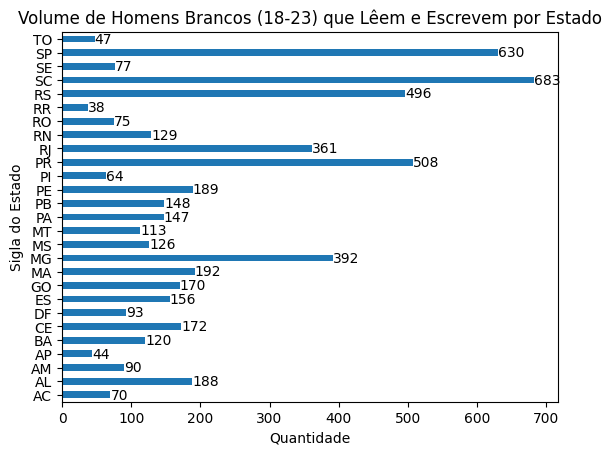

In [ ]:
# Filtro somente 'Homem'
df_homem_branco = df_comportamento[df_comportamento['sexo'] == 'Homem']

# Agrupando os dados por sigla do estado e somando a contagem
grafico = df_homem_branco.groupby('sigla')['contagem'].sum().reset_index()

# Plotando o gráfico de barras horizontais
ax = grafico.plot(kind='barh', x='sigla', y='contagem', legend=False)

# Adicionando título e rótulos
plt.title('Volume de Homens Brancos (18-23) que Lêem e Escrevem por Estado')
plt.xlabel('Quantidade')
plt.ylabel('Sigla do Estado')

# Adicionando rótulos nas barras
for index, value in enumerate(grafico['contagem']):
    ax.text(value, index, str(value), va='center')

# Exibindo o gráfico
plt.show()

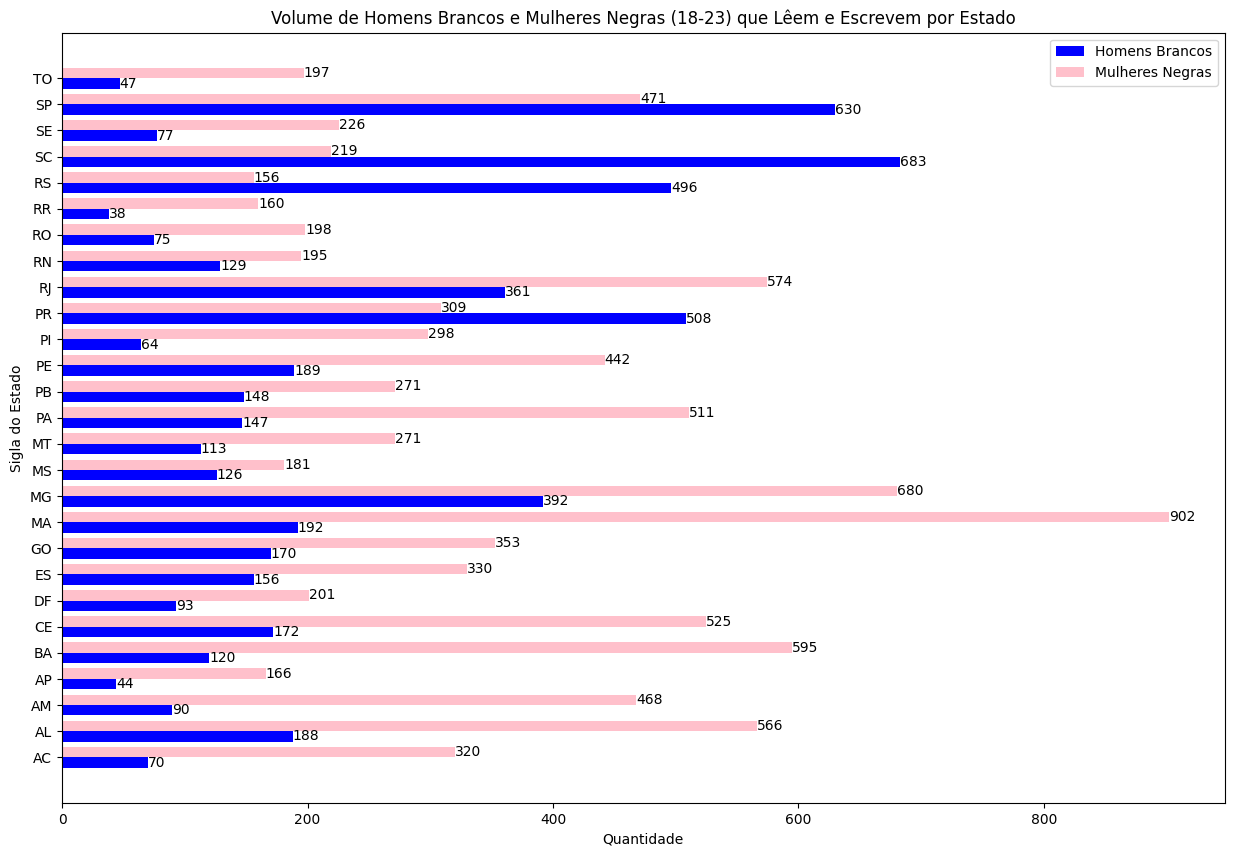

In [ ]:
# Filtro somente 'Homem'
df_homem_branco = df_comportamento[df_comportamento['sexo'] == 'Homem']

# Filtro somente 'Mulher'
df_mulher_negra = df_comportamento[df_comportamento['sexo'] == 'Mulher']

# Agrupando os dados por sigla do estado e somando a contagem
grafico_homem = df_homem_branco.groupby('sigla')['contagem'].sum().reset_index()
grafico_mulher = df_mulher_negra.groupby('sigla')['contagem'].sum().reset_index()

# Criando o gráfico com tamanho ajustado
fig, ax = plt.subplots(figsize=(15, 10))

# Definindo as posições das barras
pos_homem = range(len(grafico_homem))
pos_mulher = [x + 0.4 for x in pos_homem]  # Desloca as barras femininas

# Plotando as barras com cores rosa e azul
ax.barh(pos_homem, grafico_homem['contagem'], height=0.4, label='Homens Brancos', color='blue')
ax.barh(pos_mulher, grafico_mulher['contagem'], height=0.4, label='Mulheres Negras', color='pink')

# Ajustando os eixos y para as siglas
ax.set_yticks([p + 0.2 for p in pos_homem])  # Ajusta os rótulos
ax.set_yticklabels(grafico_homem['sigla'])

# Adicionando título e rótulos
plt.title('Volume de Homens Brancos e Mulheres Negras (18-23) que Lêem e Escrevem por Estado')
plt.xlabel('Quantidade')
plt.ylabel('Sigla do Estado')
plt.legend()

# Adicionando rótulos nas barras
for index, value in enumerate(grafico_homem['contagem']):
    ax.text(value, index, str(value), va='center')

for index, value in enumerate(grafico_mulher['contagem']):
    ax.text(value, index + 0.4, str(value), va='center')

# Exibindo o gráfico
plt.show()

5. Escreva uma conclusão do insights que encontrou no ponto 4 (OPCIONAL)

Ao analisar os gráficos apresentados, observamos uma comparação clara na distribuição de homens brancos e mulheres negras que sabem ler e escrever, segmentados por estado. Os dados revelam que a quantidade de homens brancos que possuem habilidades de leitura e escrita é significativamente inferior à de mulheres negras na maioria dos estados analisados.

Porem ao analisarmos estados do Sul do País, verificamos que esse padrão muda, sendo a quantidade de homens Brancos maior que a de mulheres negras, exemplos: Sao Paulo (SP), Santa Catarina (SC), Rio Grande do Sul (RS), e Parana (PR). Nos demais estados do Pais o numero de mulheres negras que sabem ler e escrever supera o numero de homens brancos.

Essa discrepância não é apenas numérica, mas também reflete desigualdades sociais mais profundas que persistem em nossa sociedade.

Além disso, é importante considerar que o Brasil é um país com uma população predominantemente negra e que, de acordo com dados do IBGE, a proporção da população feminina é maior que a masculina. Essa realidade torna os números ainda mais alarmantes, pois evidencia que, apesar da maioria da população ser composta por mulheres e pessoas negras, as oportunidades e acesso à educação continuam a ser desiguais.

Esses dados ressaltam a necessidade urgente de políticas públicas que promovam a equidade educacional, abordando não apenas as barreiras econômicas, mas também as sociais e culturais que contribuem para essa disparidade. Investir na educação e no empoderamento das populações historicamente marginalizadas é fundamental para construir uma sociedade mais justa e inclusiva.